In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow import 
import pandas as pd
import os
import kagglehub
from sklearn.preprocessing import LabelEncoder


# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")
# df = pd.read_csv(path + "Iris.csv")
df = pd.read_csv(os.path.join(path, "Iris.csv"))
print("Path to dataset files:", path)

Path to dataset files: C:\Users\vpthi\.cache\kagglehub\datasets\arshid\iris-flower-dataset\versions\1


In [ ]:
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
y = df["species"].values


encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
#Transform y labels into 0,1,2

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', name = 'L1'),
    tf.keras.layers.Dense(64, activation= 'relu', name = 'L2'),
    tf.keras.layers.Dense(3, activation = 'softmax', name = 'L3')
])
#So, why layer 1, layer 2 used relu and L3 used sigmoid?
#L1 takes the input variable which is X and then it takes on a relu activation inside that layer.
#Say that L1 takes on the [TE, features] so basically what the relu activation is that it finds the np.dot of (X, w[layer, j]) + b
# And since, we're not implementing logistic regression, g(z) becomes z but it works differently.
# Instead, they'll seek the maximum of a prediction once each training example.
# And, it becomes repetitive when it is converted into a vector that is switched to layer 2 whereas it has 64 training examples that has been predicted with maximum output
# But, you may wonder, what is the a[layer2] shape, it would be [64, 3] because it takes on 64 examples from layer 1 that has learned.
# But, for the 3, it is for the next layer.
# Moving on, it used the same relu function upon every training example under 3 features which is to identy whether it is 0, 1, 2
# Now, onto layer 3, the softmax here acts not exactly the same as softmax solely based on logistic regression but it'd help with multiple classification
# So, what does it do exactly inside the function, well it'd take on 64 rows, and 3 rows, so this is going to be:
# z = np.dot(a[2].T * w[3]) + b
# g(z) is the sigmoid function
# To see whether if it is right or not
# But, for softmax, it is like this:
# Each a[j] will be e^(z[j])/np.sum(e[i, j]) (this must be calculated before) to see how much percentage it has 
 

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#The model automatically compiles your model automatically with the cost function that it has made which is -log... for each choice that you've made within your output
#About the optimizer 'adam', it automatically chooses the best learning rate alpha
#Optimizer = 'adam'
"""
Adam = Adaptive Moment Estimation.

It adjusts the learning rate for each parameter automatically based on gradients’ history (momentum + RMSProp ideas combined).

So you don’t have to manually fine-tune learning rate α as much (though sometimes you still should).
"""


Epoch 1/100


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1750 - loss: 1.2287 - val_accuracy: 0.0000e+00 - val_loss: 1.6450
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4167 - loss: 1.0417 - val_accuracy: 0.0000e+00 - val_loss: 1.5095
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4750 - loss: 0.9418 - val_accuracy: 0.0000e+00 - val_loss: 1.4862
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8333 - loss: 0.8637 - val_accuracy: 0.0000e+00 - val_loss: 1.3489
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8333 - loss: 0.7822 - val_accuracy: 0.0000e+00 - val_loss: 1.3868
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8333 - loss: 0.7121 - val_accuracy: 0.0000e+00 - val_loss: 1.3176
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8333 - loss: 0.6486 - val_accuracy: 0.0000e+00 - val_loss: 1.2730
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8333 - loss: 0.5933 - val_accuracy: 0.

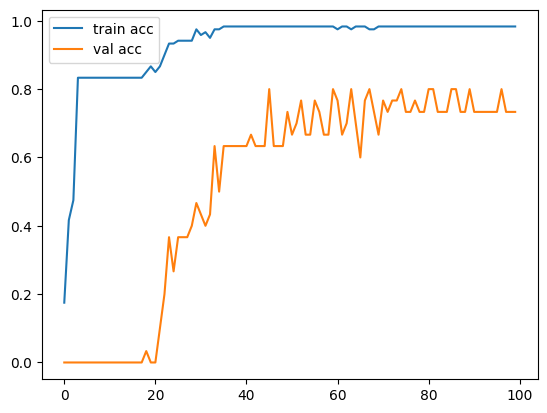

In [ ]:
history = model.fit(X, y_encoded, epochs=100, validation_split=0.2)
#What does this do? It automatically compute predictions
#Compare prediction vs true labels with our loss function
#And, not only that it backpropagates, and automatically setting weights using Adam
# Repeats for all training examples, for however many epochs you set.
#Validation_split takes 20% of the training data and sets it aside for validation
#
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [45]:
model.evaluate(X,y_encoded) 
X_test = np.array([[5.1, 3.5, 1.4, 0.2]])  # shape (1,4)

pred = model.predict(X_test)
print("Raw probabilities:", pred)

pred_class = np.argmax(pred, axis=1)  # choose highest probability
print("Predicted class index:", pred_class)

# Convert back to original flower name
flower = encoder.inverse_transform(pred_class)
print("Predicted flower:", flower[0])


# y_test = [[1]]
# model.fit()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3333 - loss: 1.4290  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Raw probabilities: [[0.39336288 0.3378174  0.26881972]]
Predicted class index: [0]
Predicted flower: Iris-setosa
